In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('./data/Train.csv')

df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   ID                   1000 non-null   int64
 1   Warehouse_block      1000 non-null   str  
 2   Mode_of_Shipment     1000 non-null   str  
 3   Customer_care_calls  1000 non-null   int64
 4   Customer_rating      1000 non-null   int64
 5   Cost_of_the_Product  1000 non-null   int64
 6   Prior_purchases      1000 non-null   int64
 7   Product_importance   1000 non-null   str  
 8   Gender               1000 non-null   str  
 9   Discount_offered     1000 non-null   int64
 10  Weight_in_gms        1000 non-null   int64
 11  Reached.on.Time_Y.N  1000 non-null   int64
dtypes: int64(8), str(4)
memory usage: 93.9 KB


In [3]:
df['Cost_of_the_Product'].mean()

np.float64(200.316)

In [4]:
df['Cost_of_the_Product'].value_counts()
df['Weight_in_gms'].value_counts()
df['Weight_in_gms'].iloc[0:20]
df['Reached.on.Time_Y.N'].unique()

array([1, 0])

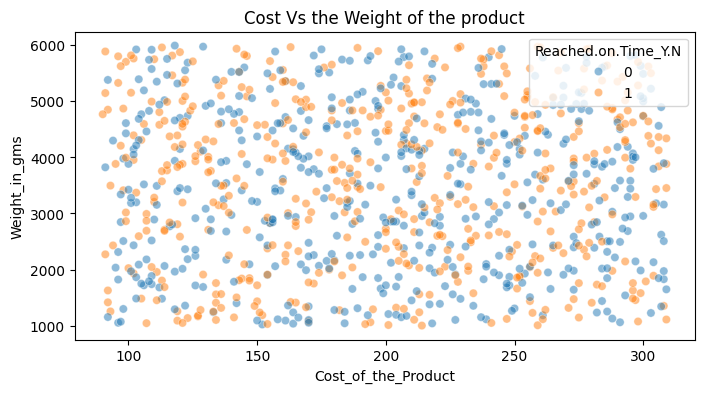

In [5]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='Cost_of_the_Product',y='Weight_in_gms', hue='Reached.on.Time_Y.N',data=df,alpha = 0.5)
plt.title("Cost Vs the Weight of the product")
plt.show()

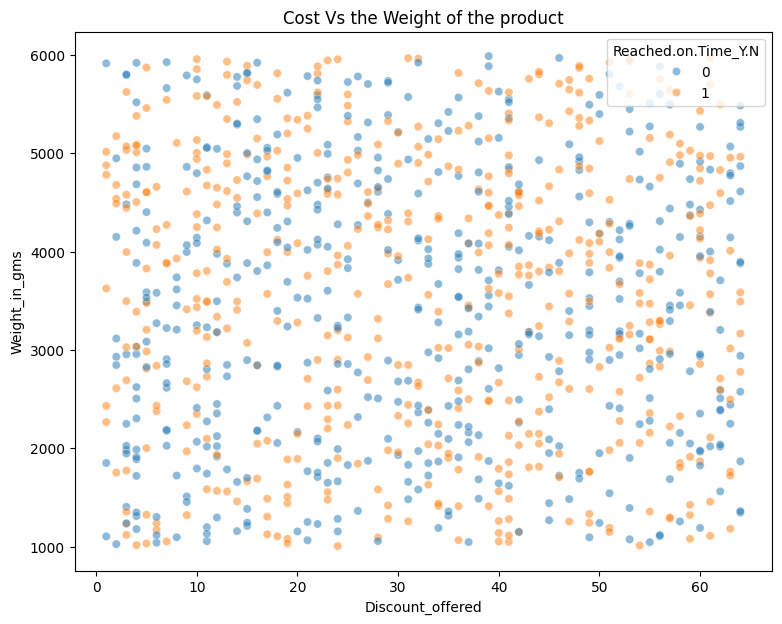

In [6]:
plt.figure(figsize=(9,7))
sns.scatterplot(x='Discount_offered',y='Weight_in_gms', hue='Reached.on.Time_Y.N',data=df,alpha = 0.5)
plt.title("Cost Vs the Weight of the product")
plt.show()

In [7]:
print("Pivot Table: Average Customer Rating")
pivot1 = df.pivot_table(values = 'Customer_rating',index = "Warehouse_block",columns="Mode_of_Shipment",aggfunc='mean')
display(pivot1)

Pivot Table: Average Customer Rating


Mode_of_Shipment,Flight,Road,Ship
Warehouse_block,,,
A,3.288462,2.634921,3.024390
B,2.650000,3.123077,3.000000
C,3.132353,3.012987,2.913043
D,2.985507,2.814286,2.824324
F,3.054795,3.271429,3.000000


In [8]:
avg_cost = df['Cost_of_the_Product'].mean()
avg_cost

np.float64(200.316)

In [9]:
high_cost = df[df['Cost_of_the_Product']>avg_cost]
high_cost
print(f"Number of high Cost Shipments (>{avg_cost:.2f}):{len(high_cost)}")

Number of high Cost Shipments (>200.32):509


In [10]:
high_imp_discount = df[df['Product_importance'] == 'high']['Discount_offered'].mean()
print(f"Average Discount for high importance products {high_imp_discount} ")

Average Discount for high importance products 30.91304347826087 


In [13]:
medium_imp_discount = df[df['Product_importance'] == 'medium']['Discount_offered'].mean()
print(f"Average Discount for medium importance products: {medium_imp_discount}")


Average Discount for medium importance products: 32.49846153846154


In [14]:
low_imp_discount = df[df['Product_importance'] == 'low']['Discount_offered'].mean()
print(f"Average Discount for low importance products: {low_imp_discount}")


Average Discount for low importance products: 32.4957507082153


In [15]:
low_cost_shipments = df[df['Cost_of_the_Product'] < avg_cost]
print(f"Number of low cost shipments (<{avg_cost:.2f}): {len(low_cost_shipments)}")


Number of low cost shipments (<200.32): 491


In [16]:
max_cost = df['Cost_of_the_Product'].max()
min_cost = df['Cost_of_the_Product'].min()

print(f"Maximum Product Cost: {max_cost}")
print(f"Minimum Product Cost: {min_cost}")


Maximum Product Cost: 309
Minimum Product Cost: 90
